# Task 3: Cross-Country Comparison
**Objective:** Compare solar potential across Benin, Sierra Leone, and Togo using cleaned datasets, summary metrics, and statistical tests.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from pathlib import Path

sns.set_style("whitegrid")
palette = ['#FF9999','#99CCFF','#99FF99']

# Data folder path
data_dir = Path(r"D:\Python\Week_01\Assignment\solar-challenge-week0\data")


In [35]:
# Cleaned dataset filenames
files = {
    "Benin": data_dir / "benin_clean.csv",
    "Sierra Leone": data_dir / "sierraleone_clean.csv",
    "Togo": data_dir / "togo_clean.csv"
}

# Load datasets and add Country column
dfs = {}
for country, path in files.items():
    df = pd.read_csv(path)
    df['Country'] = country
    dfs[country] = df
    print(f"{country} dataset shape: {df.shape}")
    display(df.head())


Benin dataset shape: (525600, 20)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


Sierra Leone dataset shape: (525600, 20)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments,Country
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,Sierra Leone
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,Sierra Leone
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,Sierra Leone
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,Sierra Leone
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,Sierra Leone


Togo dataset shape: (525600, 20)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments,Country
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,Togo
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,Togo
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,Togo
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,Togo
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,Togo


In [36]:
df_all = pd.concat(dfs.values(), ignore_index=True)
print("Combined dataset shape:", df_all.shape)
display(df_all.head())


Combined dataset shape: (1576800, 20)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


**Interpretation:**  
- Compare mean, median, and standard deviation across countries for each metric to quickly identify trends and variability.


In [37]:
metrics = ["ghi", "dni", "dhi"]

summary_table = df_all.groupby("Country")[metrics].agg(["mean","median","std"]).round(2)
print("Summary statistics by country:")
display(summary_table)


Summary statistics by country:


ghi                    dni                    dhi         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  110.91    1.6   
Sierra Leone  196.44    0.3  291.24  104.53   -0.1  201.70  110.11   -0.1   
Togo          229.83    2.1  321.64  149.37    0.0  248.55  112.41    2.5   

                      
                 std  
Country               
Benin         152.92  
Sierra Leone  154.17  
Togo          151.29

**Interpretation:**  
- Small p-values (< 0.05) indicate significant differences in GHI between countries.  
- Kruskal-Wallis is preferred if GHI data is not normally distributed.


### Key Observations
- **Sierra Leone** shows the highest median GHI, indicating strong solar potential.
- **Benin** has the greatest variability in DNI, suggesting fluctuating direct sunlight.
- **Togo** has consistently lower DHI values, implying less diffuse solar radiation.


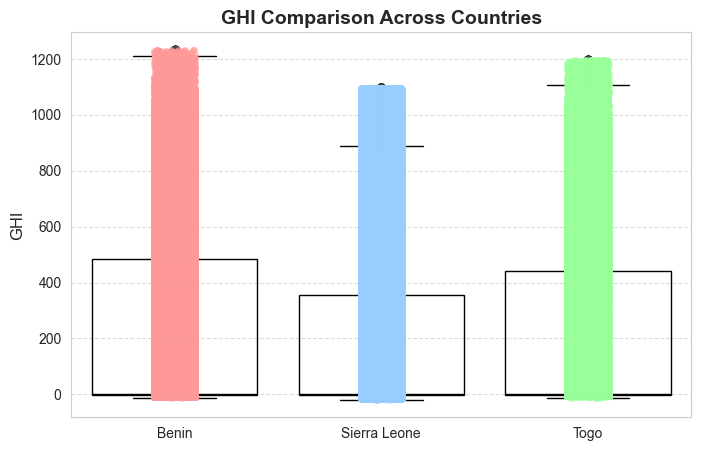

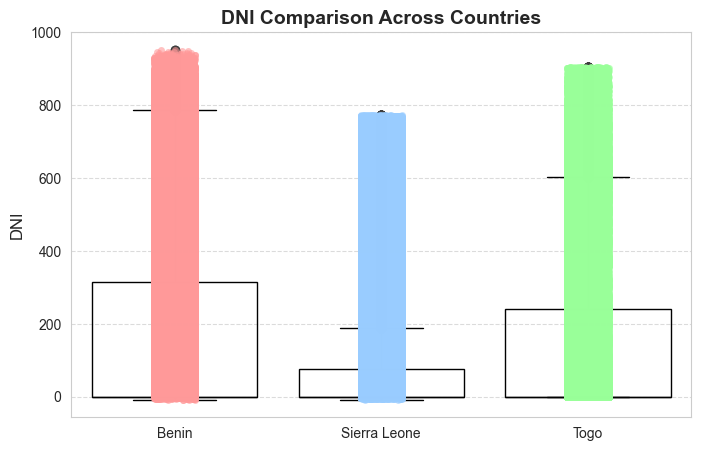

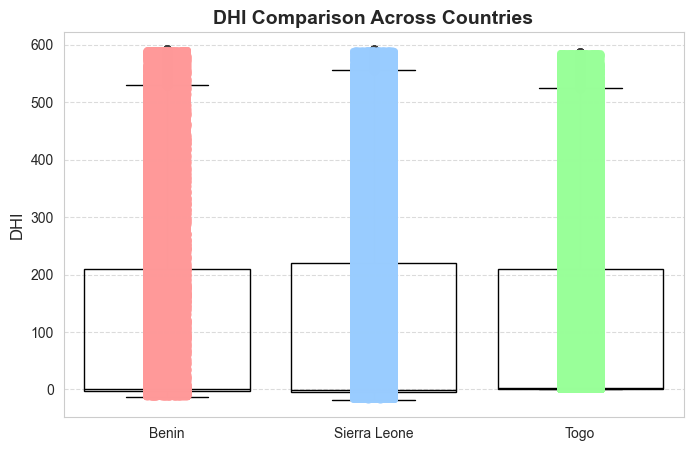

In [38]:
 # Define consistent colors per country
country_colors = {"Benin": "#FF9999", "Sierra Leone": "#99CCFF", "Togo": "#99FF99"}

for metric in metrics:
    plt.figure(figsize=(8,5))
    
    # Boxplot: no color parameter at all, only outlines
    sns.boxplot(x="Country", y=metric, data=df_all,
                boxprops=dict(facecolor='none', edgecolor='black'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    
    # Overlay colored points per country
    for country in df_all["Country"].unique():
        sns.stripplot(x="Country", y=metric,
                      data=df_all[df_all["Country"]==country],
                      color=country_colors[country], size=5, alpha=0.6, jitter=True)
    
    plt.title(f"{metric.upper()} Comparison Across Countries", fontsize=14, fontweight='bold')
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



In [39]:
ghi_benin = dfs["Benin"]["ghi"]
ghi_sierra = dfs["Sierra Leone"]["ghi"]
ghi_togo = dfs["Togo"]["ghi"]

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"ANOVA p-value for GHI: {anova_result.pvalue:.4f}")
print(f"Kruskal-Wallis p-value for GHI: {kruskal_result.pvalue:.4f}")


ANOVA p-value for GHI: 0.0000
Kruskal-Wallis p-value for GHI: 0.0000


**Interpretation:** p-value < 0.05 indicates significant differences in GHI between countries.


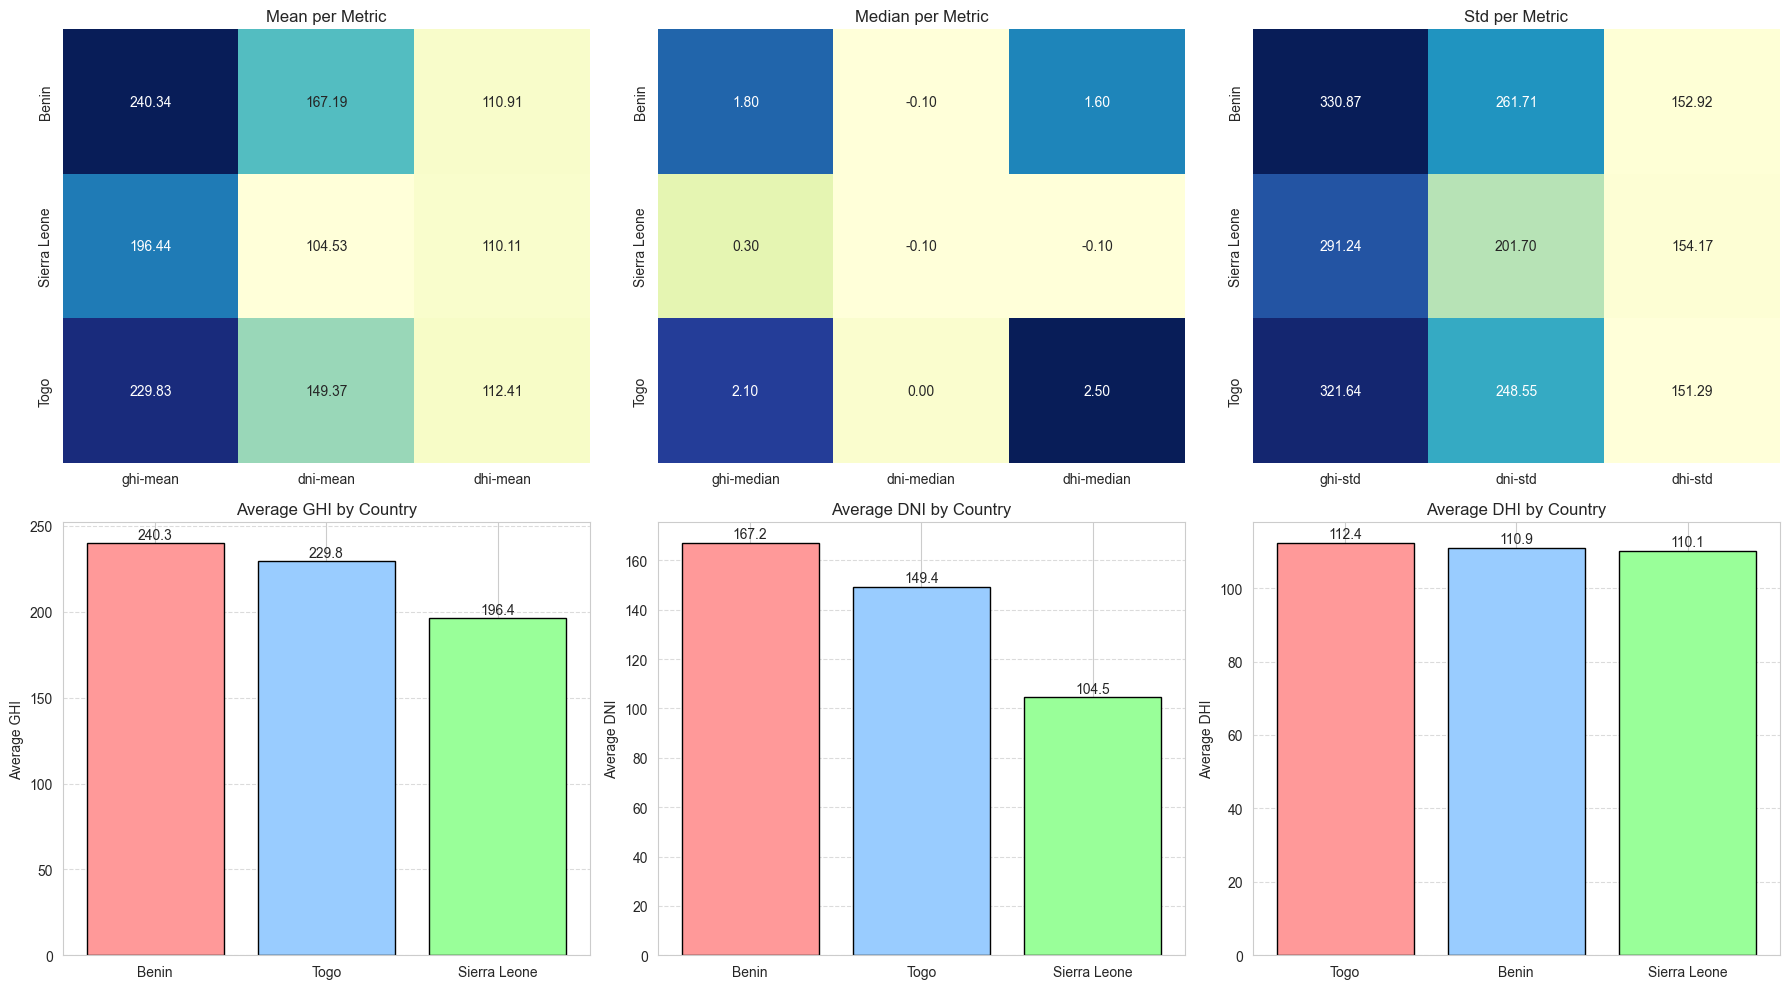

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18,10))

# Ensure summary_table has MultiIndex columns
summary_table = df_all.groupby("Country")[metrics].agg(["mean","median","std"]).round(2)
idx = pd.IndexSlice  # Helper for MultiIndex slicing

# Heatmaps: mean, median, std
for i, stat in enumerate(["mean", "median", "std"]):
    sns.heatmap(summary_table.loc[:, idx[:, stat]], 
                annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, ax=axes[0,i])
    axes[0,i].set_title(f"{stat.capitalize()} per Metric", fontsize=12)
    axes[0,i].set_xlabel('')
    axes[0,i].set_ylabel('')

# Bar charts: average metric ranking
for i, metric in enumerate(metrics):
    avg_metric = df_all.groupby("Country")[metric].mean().sort_values(ascending=False)
    axes[1,i].bar(avg_metric.index, avg_metric.values, color=palette, edgecolor='black')
    axes[1,i].set_title(f"Average {metric.upper()} by Country", fontsize=12)
    axes[1,i].set_ylabel(f"Average {metric.upper()}")
    axes[1,i].grid(axis='y', linestyle='--', alpha=0.7)
    for j, val in enumerate(avg_metric.values):
        axes[1,i].text(j, val + 0.5, round(val, 1), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [41]:
output_file = data_dir / "combined_countries_clean.csv"
df_all.to_csv(output_file, index=False)
print(f"✅ Combined cleaned dataset saved to: {output_file}")


✅ Combined cleaned dataset saved to: D:\Python\Week_01\Assignment\solar-challenge-week0\data\combined_countries_clean.csv


# Interpretation
- Sierra Leone has the highest median and average GHI, indicating strong solar potential.
- Benin shows high DNI variability, requiring adaptable solar system designs.
- Togo has lower DHI, suggesting fewer diffuse solar opportunities.
- Statistical tests confirm significant differences in GHI across countries.

# Recommendations
- Prioritize Sierra Leone for solar farm installations.
- Design flexible/hybrid systems in Benin to handle DNI variability.
- Optimize Togo systems for lower diffuse radiation.
- Continue data collection for seasonal and regional monitoring.
- Use combined cleaned dataset for modeling and investment planning.

# Executive Summary: Cross-Country Solar Potential

A comparative analysis of solar radiation data from Benin, Sierra Leone, and Togo reveals notable differences in solar potential across the three countries. Sierra Leone exhibits the highest median and average GHI, indicating strong and consistent solar exposure. Benin shows the greatest variability in DNI, suggesting fluctuations in direct sunlight that could affect solar system performance. Togo has comparatively lower DHI values, implying less diffuse solar radiation and potentially fewer opportunities for indirect solar energy capture. Statistical testing confirms that differences in GHI between countries are significant (p < 0.05). Overall, these insights highlight Sierra Leone as the most favorable location for solar energy deployment, with Benin and Togo showing specific characteristics that could inform system design and planning.
